In [3]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [2]:
# Upload the file
uploaded = files.upload()
file_name = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

Saving cleaned_bangalore_housing.csv to cleaned_bangalore_housing.csv


In [4]:
#Shape and first 5 rows
print(f"Shape: {df.shape}")
print(df.head())

# Data types
print("\n=== Data Types ===")
print(df.dtypes)

# Missing values
print("\n=== Missing Values ===")
print(df.isnull().sum())

# Descriptive statistics
print("\n=== Descriptive Statistics ===")
print(df.describe(include='all'))

Shape: (12431, 11)
              area_type   availability                  location       size  \
0  super built-up  area         19-dec  electronic city phase ii      2 bhk   
1            plot  area  ready to move          chikka tirupathi  4 bedroom   
2        built-up  area  ready to move               uttarahalli      3 bhk   
3  super built-up  area  ready to move        lingadheeranahalli      3 bhk   
4  super built-up  area  ready to move                  kothanur      2 bhk   

      society  total_sqft  bath  balcony   price  bhk  price_per_sqft  
0      coomee      1056.0   2.0      1.0   39.07  2.0     3699.810606  
1     theanmp      2600.0   5.0      3.0  120.00  4.0     4615.384615  
2  no society      1440.0   2.0      3.0   62.00  3.0     4305.555556  
3     soiewre      1521.0   3.0      1.0   95.00  3.0     6245.890861  
4  no society      1200.0   2.0      1.0   51.00  2.0     4250.000000  

=== Data Types ===
area_type          object
availability       object
lo

In [6]:
# Convert categorical features
cat_cols = ['area_type', 'availability', 'location', 'size', 'society']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))
# Handle outliers
sqft_cap = df['total_sqft'].quantile(0.99)
df['total_sqft'] = np.where(df['total_sqft'] > sqft_cap, sqft_cap, df['total_sqft'])

In [7]:
# Train-Test Split
X = df.drop(['price', 'price_per_sqft'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Model Training
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [11]:
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nModel Performance:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.4f}")


Model Performance:
Mean Absolute Error: 28.44
R-squared: 0.7356


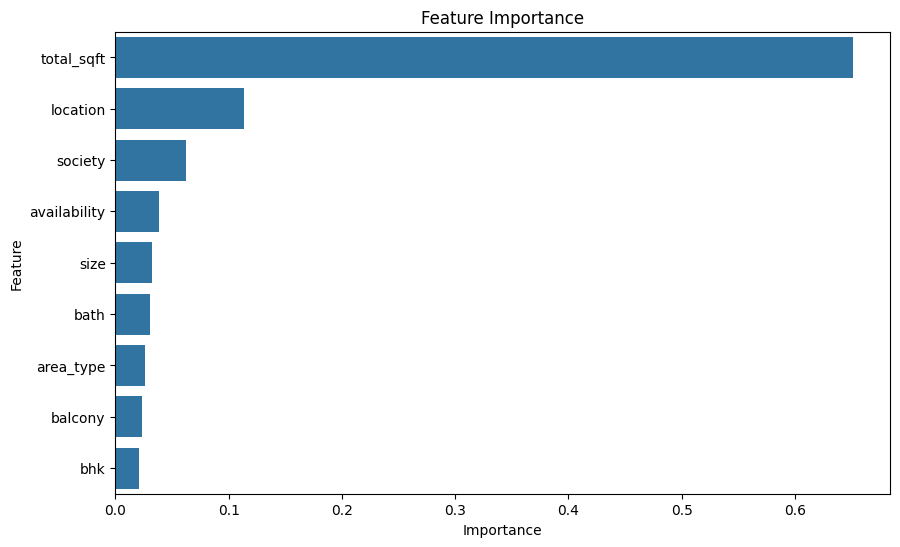

In [12]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

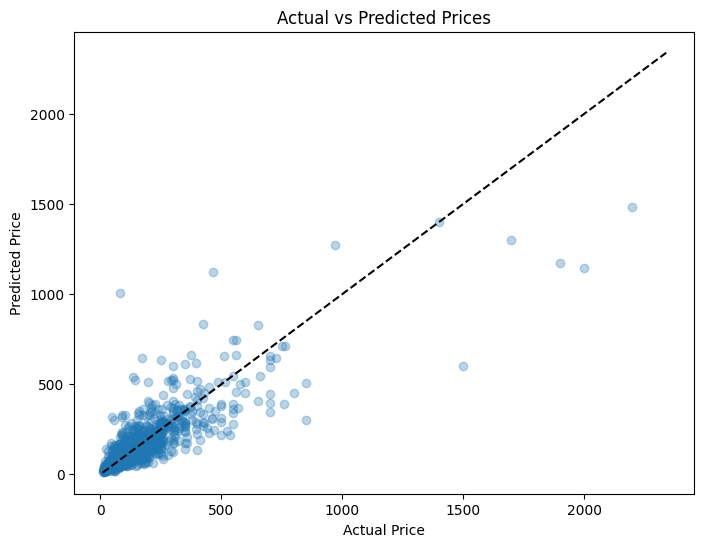

In [13]:
# Actual vs Predicted Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

In [14]:
# Save Model
import joblib
joblib.dump(model, 'bangalore_home_prices.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')

files.download('bangalore_home_prices.pkl')
files.download('scaler.pkl')
files.download('label_encoder.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>